# Auto

In [3]:
# Download and format the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Auto.csv", "Auto.csv")
Auto <- read.csv("Auto.csv")
Auto$origin <- factor(Auto$origin)

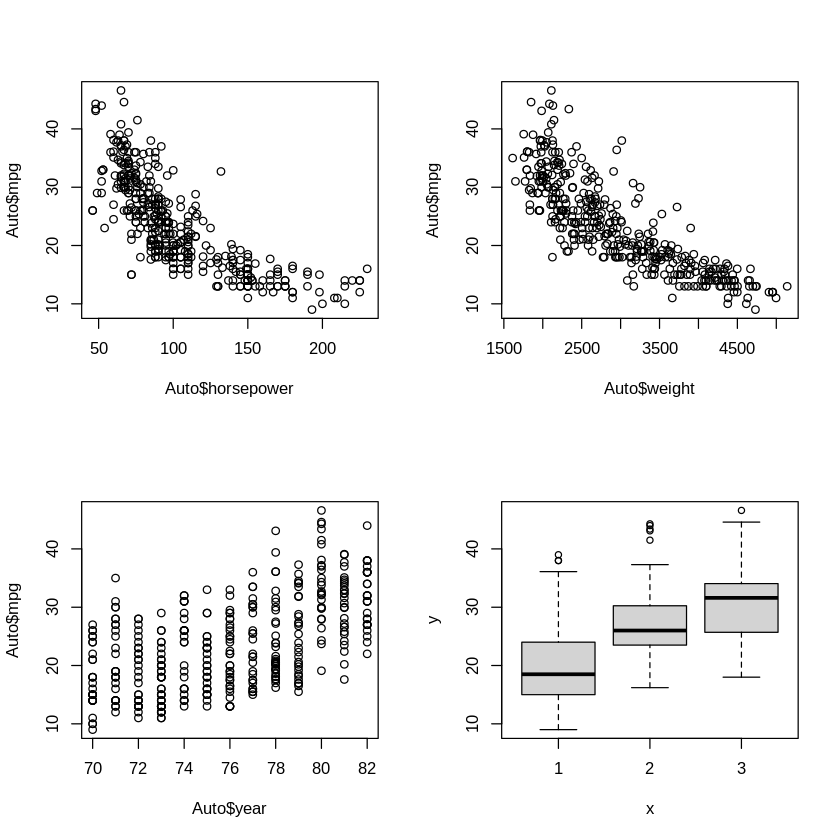

In [4]:
par(mfrow = c(2,2))
plot(Auto$horsepower, Auto$mpg)
plot(Auto$weight, Auto$mpg)
plot(Auto$year, Auto$mpg)
plot(Auto$origin, Auto$mpg)

# Polynomials

In [19]:
poly.lm <- lm(mpg ~ poly(horsepower, degree = 2), data = Auto)
summary(poly.lm)


Call:
lm(formula = mpg ~ poly(horsepower, degree = 2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     23.4459     0.2209  106.13   <2e-16 ***
poly(horsepower, degree = 2)1 -120.1377     4.3739  -27.47   <2e-16 ***
poly(horsepower, degree = 2)2   44.0895     4.3739   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


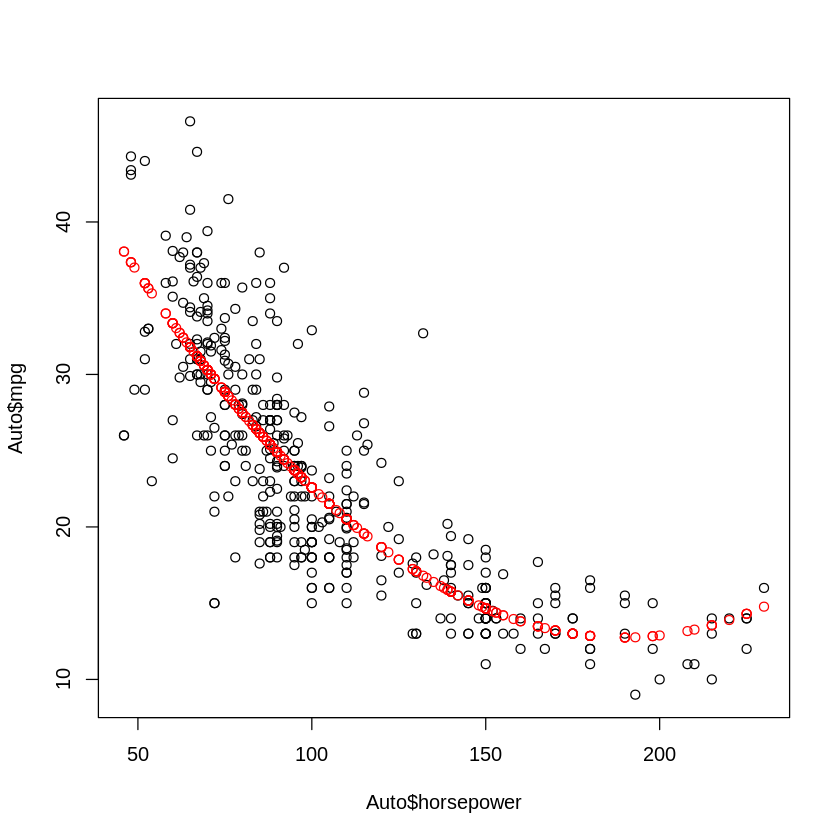

In [20]:
plot(Auto$horsepower, Auto$mpg)
points(Auto$horsepower, predict(poly.lm), col = "red")

# Splines

In [21]:
library(splines) #ns


In [29]:
spline.lm <-lm(mpg ~ ns(horsepower, df = 2), data = Auto)
summary(spline.lm)



Call:
lm(formula = mpg ~ ns(horsepower, df = 2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8454  -2.4171  -0.1837   2.2563  15.8921 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              38.3090     0.6779   56.52   <2e-16 ***
ns(horsepower, df = 2)1 -41.4766     1.5831  -26.20   <2e-16 ***
ns(horsepower, df = 2)2 -16.0003     1.2308  -13.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.354 on 389 degrees of freedom
Multiple R-squared:  0.6904,	Adjusted R-squared:  0.6888 
F-statistic: 433.7 on 2 and 389 DF,  p-value: < 2.2e-16


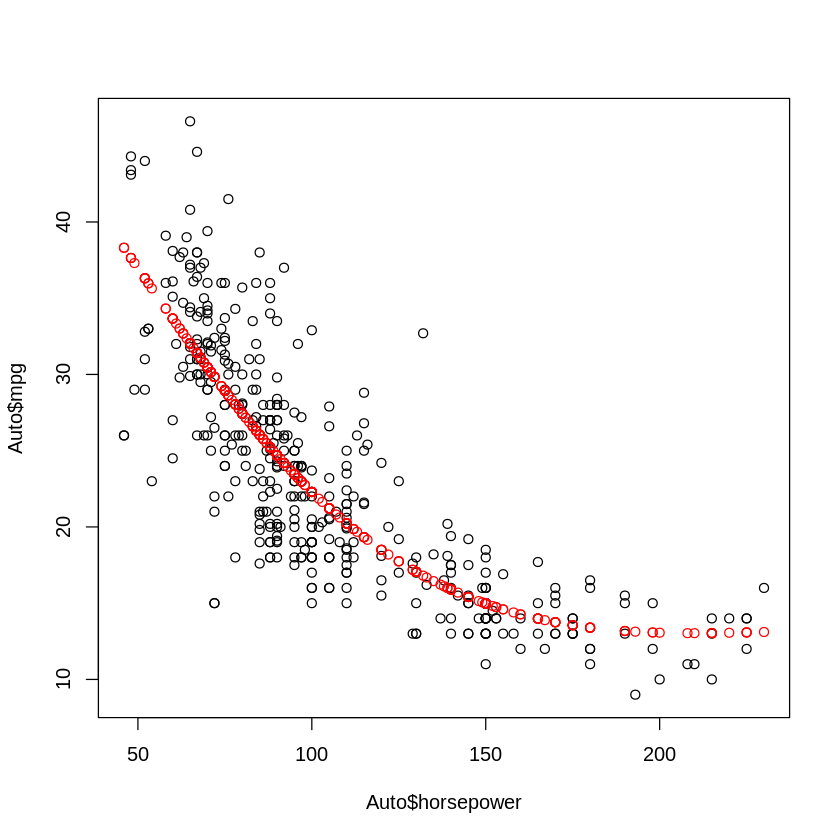

In [30]:
plot(Auto$horsepower, Auto$mpg)
points(Auto$horsepower, predict(spline.lm), col = "red")


# Cross validation

In [32]:
library(boot) #cv.glm


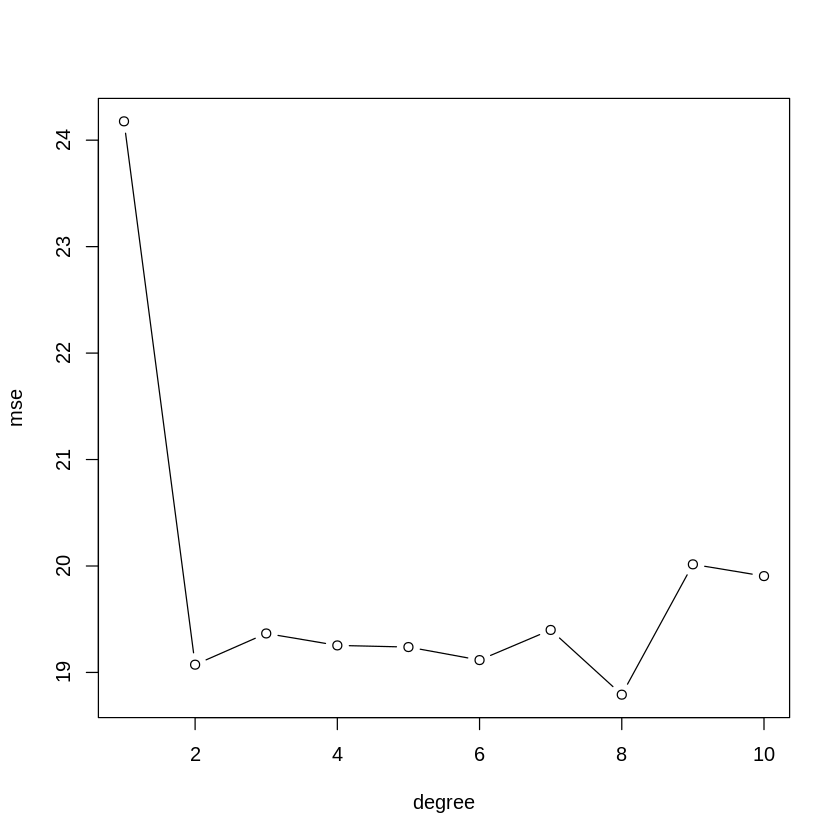

In [41]:
degree <- seq(1,10)
mse <- rep(0,10)

for (i in degree){
  model <- glm(mpg ~ poly(horsepower, i), data = Auto)
  mse[i]<- cv.glm(Auto, model, K = 5)$delta[1]
}
plot(degree, mse, type = "b")


Call:
glm(formula = mpg ~ ns(horsepower, df = 2), data = Auto)

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              38.3090     0.6779   56.52   <2e-16 ***
ns(horsepower, df = 2)1 -41.4766     1.5831  -26.20   <2e-16 ***
ns(horsepower, df = 2)2 -16.0003     1.2308  -13.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 18.95859)

    Null deviance: 23819.0  on 391  degrees of freedom
Residual deviance:  7374.9  on 389  degrees of freedom
AIC: 2270.8

Number of Fisher Scoring iterations: 2


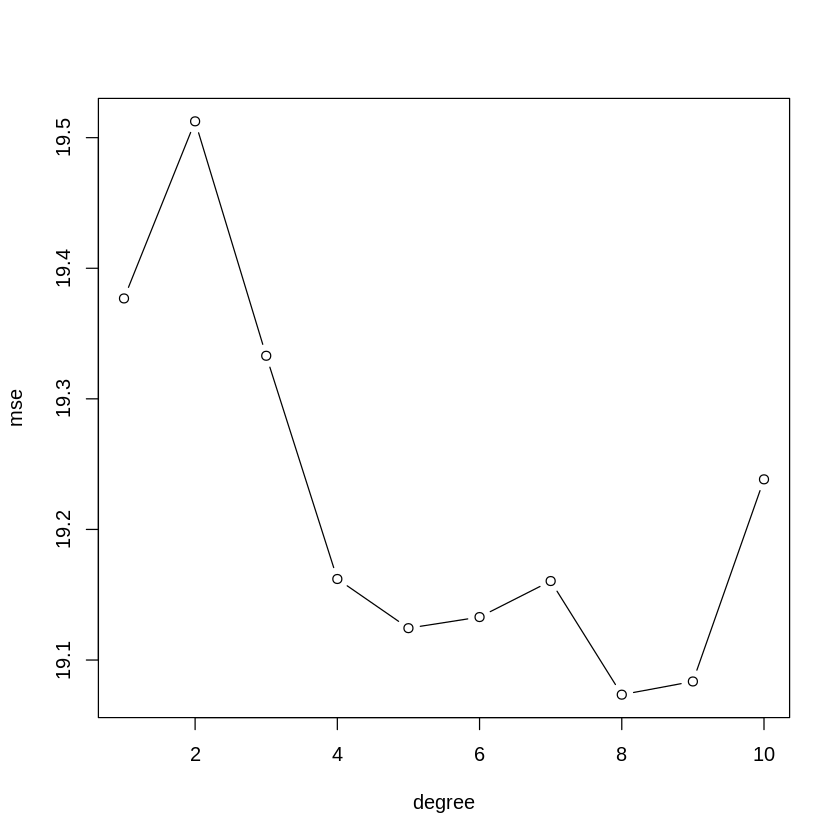

In [43]:
#Splines DF
degree <- seq(1,10)
mse <- rep(0,10)

for (i in degree){
  model <- glm(mpg ~ ns(horsepower, df = i), data = Auto)
  mse[i]<- cv.glm(Auto, spline.lm, K = 5)$delta[1]
}
plot(degree, mse, type = "b")


# Generalized additive model

In [44]:
# model with splined horsepower and weight but linear year and origin predictors
gam.lm <- lm(mpg ~ ns(horsepower, df = 2)+ns(weight, df = 2)+year+origin, data = Auto)
summary(gam.lm)


Call:
lm(formula = mpg ~ ns(horsepower, df = 2) + ns(weight, df = 2) + 
    year + origin, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6139 -1.7007 -0.0748  1.5340 12.1662 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -23.80995    3.55749  -6.693 7.77e-11 ***
ns(horsepower, df = 2)1 -10.68112    2.10511  -5.074 6.08e-07 ***
ns(horsepower, df = 2)2  -1.00456    1.34298  -0.748  0.45491    
ns(weight, df = 2)1     -23.37419    1.96256 -11.910  < 2e-16 ***
ns(weight, df = 2)2     -10.55358    1.25388  -8.417 7.76e-16 ***
year                      0.78872    0.04522  17.441  < 2e-16 ***
origin2                   1.19780    0.45525   2.631  0.00885 ** 
origin3                   1.26895    0.47482   2.673  0.00785 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.898 on 384 degrees of freedom
Multiple R-squared:  0.8646,	Adjusted R-squared:  0.8622 
F-statist

In [45]:
# completly linear model
gam.lm <- lm(mpg ~ horsepower+weight+year+origin, data = Auto)
summary(gam.lm)


Call:
lm(formula = mpg ~ horsepower + weight + year + origin, data = Auto)

Residuals:
   Min     1Q Median     3Q    Max 
-9.553 -2.110 -0.027  1.795 13.476 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.722e+01  4.193e+00  -4.107 4.89e-05 ***
horsepower  -8.480e-03  9.343e-03  -0.908  0.36463    
weight      -5.564e-03  4.408e-04 -12.622  < 2e-16 ***
year         7.544e-01  5.156e-02  14.631  < 2e-16 ***
origin2      1.955e+00  5.186e-01   3.769  0.00019 ***
origin3      2.283e+00  5.243e-01   4.353 1.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.338 on 386 degrees of freedom
Multiple R-squared:  0.8194,	Adjusted R-squared:  0.8171 
F-statistic: 350.3 on 5 and 386 DF,  p-value: < 2.2e-16


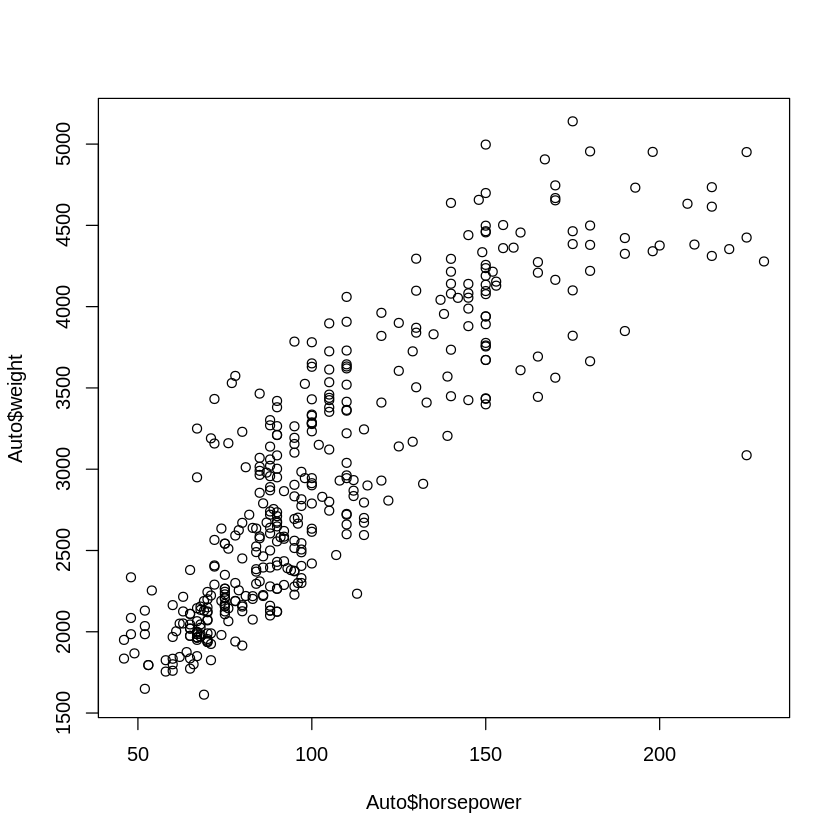

In [46]:
# Horsepower and weight seem correlated which could be redundent to use both in model
plot(Auto$horsepower, Auto$weight)